In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
cd Downloads

/Users/kantha/Downloads


In [4]:
heart = pd.read_csv('clevelanda.csv')

In [5]:
heart.shape

(303, 14)

In [6]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Heart Disease Classification - Based on below parameters we need to make a statement whether a person going to get heart disease or not. Client provided with 4 Values (1,2,3,4) Presence of HD and 0 Abse of HD. 
#cp-- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic(Discrete) 
#trestbps - resting blood pressure(Continuous)
#Chol - Continuous Data
#fbs - Sugar Level - discrete data
#restecg - 3 types (discrete data)
#Thalach - Maximum heart rate achieved - Continuous
#exang: exercise induced angina (1 = yes; 0 = no) 
#slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
#thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#ca: number of major vessels (0-3) colored by flourosopy

In [7]:
heart.info()
#We are able to notice object data type for ca and thal columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
gender      303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fps         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
class       303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [7]:
heart.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [7]:
heart['ca'].value_counts()
#We are able to notice 4 '?' values in ca column, What to do?

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [8]:
heart['thal'].value_counts()
#We are able to notice 2 '?' values in thal column, What to do?

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [10]:
heart['class'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: class, dtype: int64

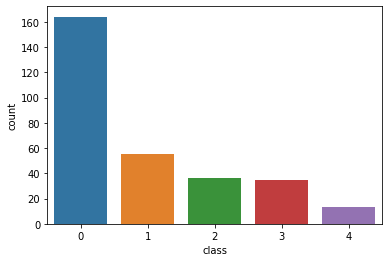

In [8]:
import seaborn as sns
sns.countplot(heart['class'])
#Majority of the data is on 0 class which represent absence of heart dies. So our model may get good accuracy on class 0 over other classes

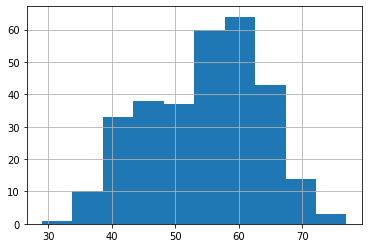

In [13]:
heart['age'].hist()

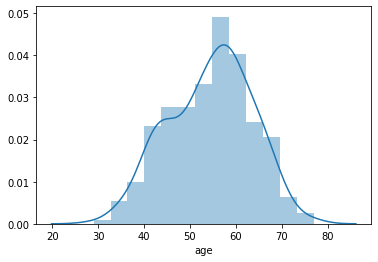

In [15]:
sns.distplot(heart['age'])

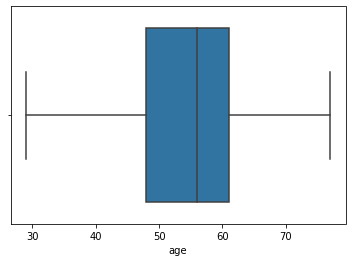

In [16]:
sns.boxplot(heart['age'])

In [18]:
heart['age'].describe()

#We are able to identify pat ranges from 29 age group to 77 age group but majority of data was concentrated across 
#56 to 61 age group. Is this data same as like your population?

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [9]:
from scipy.stats import skew
from scipy.stats import kurtosis
print(skew(heart['age']))
print(kurtosis(heart['age']))
#We are able to notice -ve skewness and -ve kurtosis we may address less amount of accuracy due to insufficient data
#We can expect skewed prediction majority of right prediction may happen around 56 to 61 age group.

-0.2080240895050745
-0.5345227201725988


In [38]:
print(heart)

     age  gender  cp  trestbps  chol  fps  restecg  thalach  exang  oldpeak  \
0     63       1   1       145   233    1        2      150      0      2.3   
1     67       1   4       160   286    0        2      108      1      1.5   
2     67       1   4       120   229    0        2      129      1      2.6   
3     37       1   3       130   250    0        0      187      0      3.5   
4     41       0   2       130   204    0        2      172      0      1.4   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45       1   1       110   264    0        0      132      0      1.2   
299   68       1   4       144   193    1        0      141      0      3.4   
300   57       1   4       130   131    0        0      115      1      1.2   
301   57       0   2       130   236    0        2      174      0      0.0   
302   38       1   3       138   175    0        0      173      0      0.0   

     slope ca thal  class  
0        3  0    6     

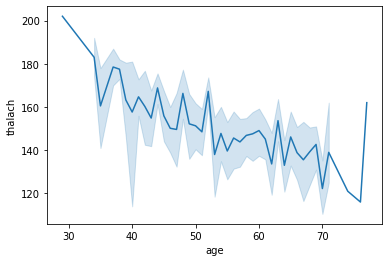

In [39]:
sns.lineplot(x = heart['age'], y = heart['thalach'])

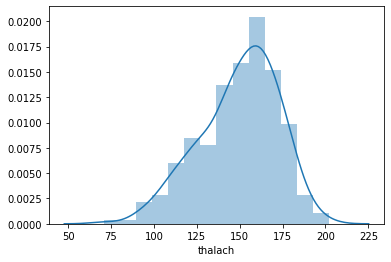

In [40]:
sns.distplot(heart['thalach'])

In [41]:
heart['thalach'].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

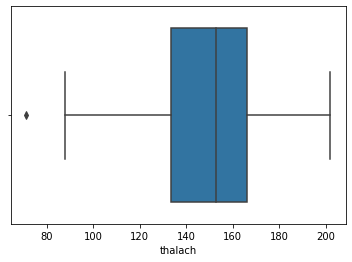

In [42]:
sns.boxplot(heart['thalach'])

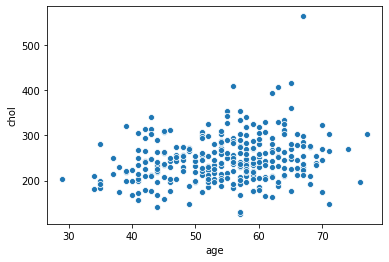

In [43]:
sns.scatterplot(x = heart['age'], y = heart['chol'])

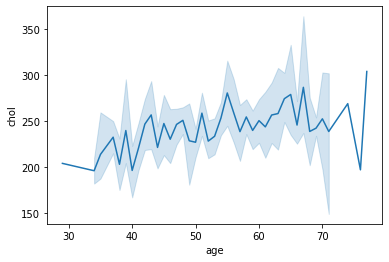

In [44]:
sns.lineplot(x = heart['age'], y = heart['chol'])

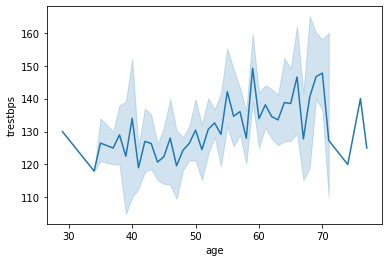

In [45]:
sns.lineplot(x = heart['age'], y = heart['trestbps'])

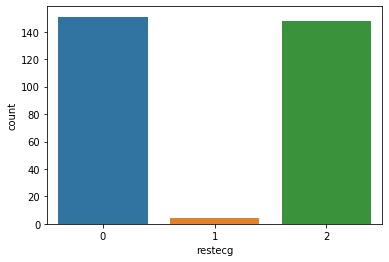

In [46]:
sns.countplot(heart['restecg'])

In [9]:
heart.dropna(axis=0)

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [10]:
heart = heart.replace('?', np.nan)

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
gender      303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fps         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          299 non-null object
thal        301 non-null object
class       303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [12]:
heart.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fps         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64

In [13]:
heart = heart.dropna()

In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
gender      297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fps         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null object
thal        297 non-null object
class       297 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [15]:
heart['ca'].value_counts()

0    174
1     65
2     38
3     20
Name: ca, dtype: int64

In [16]:
heart['ca'] = pd.to_numeric(heart['ca'])

In [17]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
gender      297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fps         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null int64
thal        297 non-null object
class       297 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 34.8+ KB


In [18]:
heart['thal'] = pd.to_numeric(heart['thal'])

In [19]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null int64
gender      297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fps         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
class       297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [20]:
X = heart.iloc[:,:13]

In [21]:
X.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [22]:
y = heart.iloc[:,13:]

In [23]:
y.head()

,class
0,0
1,2
2,1
3,0
4,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(237, 13)
(237, 1)
(60, 13)
(60, 1)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import neighbors
from sklearn.svm import SVC

In [55]:
#Training
#model = LogisticRegression()
model = neighbors.KNeighborsClassifier()
#model = DecisionTreeClassifier()
#model = SVC(kernel='linear',  gamma = 10, C= 1)
#model = RandomForestClassifier()


model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
predicted = model.predict(X_test)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0])

In [57]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted)

0.35

In [50]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test, predicted))

[[23  4  1  0  0]
 [ 8  4  0  0  0]
 [ 1  4  1  5  0]
 [ 0  4  0  1  0]
 [ 1  1  1  1  0]]


In [51]:
#Classification Report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75        28
           1       0.24      0.33      0.28        12
           2       0.33      0.09      0.14        11
           3       0.14      0.20      0.17         5
           4       0.00      0.00      0.00         4

    accuracy                           0.48        60
   macro avg       0.28      0.29      0.27        60
weighted avg       0.45      0.48      0.45        60



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = model, X = X,\
     y = y, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.4919287634408602 Accuracy Variance      0.0709402546001698
